In [1]:
# llm_groq.py
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq  # ✅ official LangChain-Groq integration

# Load environment variables
load_dotenv()

# Initialize LLM
llm = ChatGroq(
    model="llama-3.3-70b-versatile",  # or llama3-70b-8192, mixtral-8x7b-32768
    temperature=0.7,
    groq_api_key=os.getenv("GROQ_API_KEY"),
)

# Query the model
response = llm.invoke("Explain binary search in simple terms.")
print(response.content)

**Binary Search: A Simple Explanation**

Binary search is a way to quickly find an item in a sorted list. Here's how it works:

1. **Start with a sorted list**: The list must be in order, either from smallest to largest or vice versa.
2. **Find the middle point**: Look at the middle item in the list.
3. **Compare the target item**: Compare the item you're looking for (the target) to the middle item.
4. **Decide which half to search**: If the target is smaller than the middle item, look at the left half of the list. If it's larger, look at the right half.
5. **Repeat steps 2-4**: Keep finding the middle point and comparing the target until you find it or determine it's not in the list.

**Example**

Suppose you have a sorted list of numbers: 1, 2, 3, 4, 5, 6, 7, 8, 9. You want to find the number 5.

1. Start with the entire list.
2. Find the middle point: 5 (since there are 9 items, the middle is the 5th item).
3. Compare the target (5) to the middle item (5). They match!
4. You found t

In [2]:
from langgraph.graph import StateGraph, START, END
# from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [3]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [5]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = llm.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [8]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = llm.invoke(prompt).content

    state['content'] = content

    return state

In [9]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

In [12]:
intial_state = {'title': 'Rise of AI'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI', 'outline': 'Here is a detailed outline for a blog on the topic "Rise of AI":\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its growing importance in modern society\n* Thesis statement: The rise of AI is transforming the world as we know it, with significant impacts on industries, jobs, and daily life.\n\n**II. History of AI**\n\n* Early beginnings: The Dartmouth Summer Research Project on Artificial Intelligence (1956) and the first AI program, Logical Theorist (1956)\n* Development of AI in the 1960s-1980s: Rule-based expert systems, machine learning, and the first AI winter\n* Resurgence of AI in the 21st century: Advances in computing power, data storage, and machine learning algorithms\n\n**III. Current State of AI**\n\n* Types of AI: Narrow or Weak AI, General or Strong AI, and Superintelligence\n* Applications of AI: Virtual assistants (e.g., Siri, Alexa), image recognition, natural language processing, and predictive analy

In [13]:
print(final_state['outline'])

Here is a detailed outline for a blog on the topic "Rise of AI":

**I. Introduction**

* Brief overview of Artificial Intelligence (AI) and its growing importance in modern society
* Thesis statement: The rise of AI is transforming the world as we know it, with significant impacts on industries, jobs, and daily life.

**II. History of AI**

* Early beginnings: The Dartmouth Summer Research Project on Artificial Intelligence (1956) and the first AI program, Logical Theorist (1956)
* Development of AI in the 1960s-1980s: Rule-based expert systems, machine learning, and the first AI winter
* Resurgence of AI in the 21st century: Advances in computing power, data storage, and machine learning algorithms

**III. Current State of AI**

* Types of AI: Narrow or Weak AI, General or Strong AI, and Superintelligence
* Applications of AI: Virtual assistants (e.g., Siri, Alexa), image recognition, natural language processing, and predictive analytics
* Industries impacted by AI: Healthcare, financ

In [14]:
print(final_state['content'])

**The Rise of AI: Transforming the World as We Know It**

**Introduction**

Artificial Intelligence (AI) has become an integral part of modern society, transforming the way we live, work, and interact with one another. From virtual assistants like Siri and Alexa to self-driving cars and personalized medicine, AI is revolutionizing industries, jobs, and daily life. The rise of AI is a phenomenon that has been decades in the making, with significant advancements in computing power, data storage, and machine learning algorithms. In this blog, we will explore the history of AI, its current state, benefits, challenges, and future implications. The rise of AI is transforming the world as we know it, with significant impacts on industries, jobs, and daily life.

**History of AI**

The concept of Artificial Intelligence dates back to the 1950s, when computer scientists like John McCarthy, Marvin Minsky, and Nathaniel Rochester proposed the idea of creating machines that could think and learn l

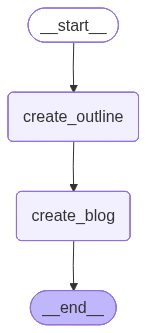

In [15]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())